In [ ]:
# *** This needs to be run on the Notebook, not Lab for the interaction to work

# Connect to RTKNAVI_Qt-x86_64.AppImage, 
# For running from phone:
#   * Rover TCP client 192.168.43.1 9042 cmd -AAA
#   * Base TCP client 192.168.43.1 9042 cmd -CCC
# Click on "O" and set:
#   * TCP Server, (127.0.0.1) option port 9060



In [13]:
time.sleep(1.1)
time.time()

1554812132.4912634

In [ ]:
# Try to make the command line rtkrcv to work

# /home/julian/extrepositories/RTKLIB-rtkexplorer/app/rtkrcv/gcc/rtkrcv -s -o /home/julian/repositories/RTK_on_the_beach/conf/csingle.conf



# using the .conf file made from saving a rtknavi setup
# setting pos1-frequency needs changing from =0 to =l1+l2
# the pre-commands must be in separate file, eg 
# file-cmdfile1      =/home/julian/repositories/RTK_on_the_beach/conf/cmdfileCCC.txt
#    No space after the '=' and file to contain "-AAA\n@"

In [17]:
# This block creates the thread that appends incoming positions into the arrays xs, ys, zs

import math
columnnames = "%  GPST                  latitude(deg) longitude(deg)  height(m)   Q  ns   sdn(m)   sde(m)   sdu(m)  sdne(m)  sdeu(m)  sdun(m) age(s)  ratio".split()

lng0, lat0 = None, None
earthrad = 6378137
nyfac = 2*math.pi*earthrad/360
def parsexyz(row):
    global lng0, lat0
    srow = row.split()
    lat, lng, height = float(srow[2]), float(srow[3]), float(srow[4])
    if lng0 is None:
        lng0, lat0 = lng, lat
    exfac = nyfac*math.cos(math.radians(lat0))
    return (lng - lng0)*exfac, (lat - lat0)*nyfac, height

port = 9063
xs, ys, zs = [ ], [ ], [ ]
sockpausedata = False
sockcleardata = False
import socket, time
def sockreadlines():
    global sockcleardata
    ss = socket.socket()
    print("connecting to port", port)
    ss.connect(socket.getaddrinfo("127.0.0.1", port)[0][-1])
    s = ss.makefile('rwb', 0)
    print("port", port, "open")
    row = s.readline()
    print(row)
    while True:
        row = s.readline()
        p = parsexyz(row)
        if sockcleardata:
            xs.clear()
            ys.clear()
            zs.clear()
            sockcleardata = False
        if not sockpausedata:
            xs.append(p[0])
            ys.append(p[1])
            zs.append(p[2])
        time.sleep(0.05)

import threading
threading.Thread(target=sockreadlines, daemon=True).start()


connecting to port 9063
port 9063 open


connecting to port 9063
port 9063 open


In [4]:
len(xs), sockpausedata

(0, False)

In [4]:
#sockpausedata = True
sockcleardata = True
len(xs)


30

ModuleNotFoundError: No module named 'bokeh.io'

In [5]:
import numpy
xs = numpy.random.normal(0,1,100)
ys = numpy.random.normal(0,1,100)

Traceback (most recent call last):
  File "/home/julian/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/home/julian/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/home/julian/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


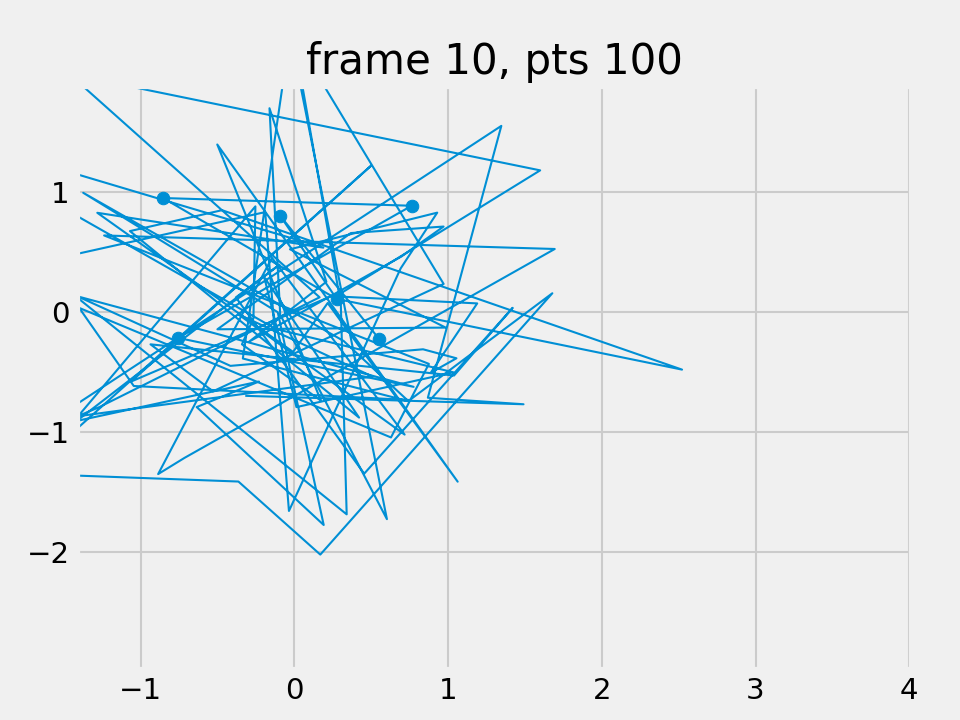

In [25]:
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
style.use('fivethirtyeight')

fig = plt.figure()
ax = fig.gca()
def animate(i):
    i1 = min(len(xs), len(ys))
    #i1 = min(i1, i)
    i0 = max(0, i1-300)
    i00 = max(0, i1-6)
    ax.clear()
    ax.plot(xs[i0:i1], ys[i0:i1], linewidth=1)
    ax.scatter(xs[i00:i1], ys[i00:i1])
    #ax.set_xlim(-10,10)
    #ax.set_ylim(-10,10)
    #imgplot = plt.imshow(img, extent=(xmin, xmax, ymin, ymax))
    plt.title("frame %d, pts %d" % (i, i1))
    #ax.show()
#ani = animation.FuncAnimation(fig, animate, interval=200)

animate(10)
plt.show()


<IPython.core.display.Javascript object>


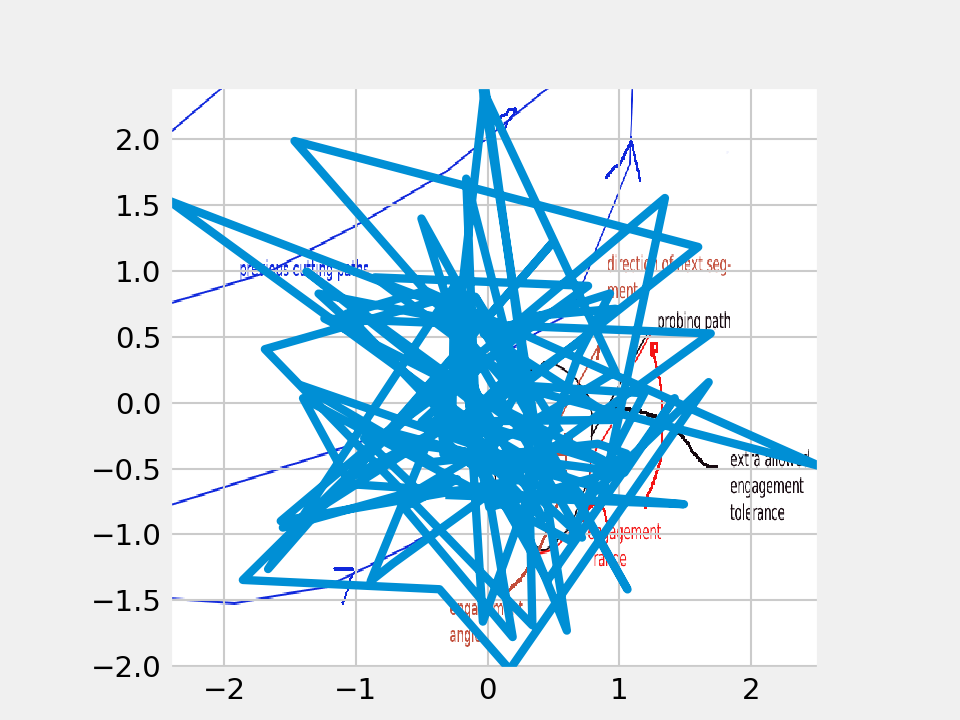

(-2.41807914562446, 2.5217118808235455, -2.025568106521034, 2.400171231388086)

In [29]:
#plt.plot(xs, ys)
%matplotlib notebook

import matplotlib.image as mpimg
import numpy

xmin, xmax, ymin, ymax = min(xs), max(xs), min(ys), max(ys)
img=mpimg.imread('/home/julian/Pictures/engage2.png')
imgplot = plt.imshow(img, extent=(xmin, xmax, ymin, ymax))
plt.plot(xs, ys)
xmin, xmax, ymin, ymax

In [44]:
import socket
ss = socket.socket()
ss.connect(socket.getaddrinfo("192.168.43.1", 9042)[0][-1])
s = ss.makefile('rwb', 0)
row = s.readline()
print(row)
ss.send(b"+AAA")
#ss.send(b"1 1009\n")

b'Hello from Android thread 4\n'


4

In [54]:
ss.send(b"3 9\n")

4

In [31]:
imheight, imwidth = img.shape[:2]
xmin, xmax, ymin, ymax = min(xs), max(xs), min(ys), max(ys)
imscale = min((xmax - xmin)/imwidth, (ymax - ymin)/imheight)
imcenx, imceny = (xmin + xmax)/2, (ymin + ymax)/2

extent = (imcenx - (imwidth/2)*imscale, imcenx + (imwidth/2)*imscale, imceny - (imheight/2)*imscale, imceny + (imheight/2)*imscale)
extent

(-2.4180791456244606,
 2.5217118808235455,
 -1.0031880749404436,
 1.3777911998074954)

In [33]:
import ipywidgets as widgets
from IPython.display import display

xmin, xmax, ymin, ymax = min(xs), max(xs), min(ys), max(ys)
def plotfigure(shiftx, shifty, scalex, linewidth):
    #outputfigure.layout.height = figureheight
    fig = plt.figure(figsize=(11,9))
    lscale = imscale*scalex
    lcenx, lceny = imcenx + shiftx, imceny + shifty
    extent = (lcenx - (imwidth/2)*lscale, lcenx + (imwidth/2)*lscale, lceny - (imheight/2)*lscale, lceny + (imheight/2)*lscale)
    imgplot = plt.imshow(img, extent=extent)
    plt.plot(xs, ys, linewidth=linewidth)
    plt.show()
    
shiftx = widgets.FloatSlider(description="shiftx", step=0.01, min=-10, max=10, value=0, continuous_update=False)
shifty = widgets.FloatSlider(description="shifty", step=0.01, min=-10, max=10, value=0, continuous_update=False)
scalex = widgets.FloatSlider(description="scalex", step=0.01, min=0.02, max=5, value=1, continuous_update=False)
linewidth = widgets.FloatSlider(description="linewidth", step=0.01, min=0.01, max=5, value=1, continuous_update=False)
#rbutton = widgets.Button(description="Pong")
#rbutton.on_click = 
cbvario = widgets.Checkbox(description="vario", value=False, indent=False)
sliders = widgets.VBox([shiftx, shifty])
scalers = widgets.VBox([scalex, linewidth])
ui = widgets.HBox([sliders, scalers])
params = {"shiftx":shiftx, "shifty":shifty, "scalex":scalex, "linewidth":linewidth }
outputfigure = widgets.interactive_output(plotfigure, params)
outputfigure.layout.height = '600px'
display(ui, outputfigure);


Output(layout=Layout(height='600px'))

In [147]:
scalex = widgets.FloatSlider(description="scalex", step=0.01, min=0.02, max=5, value=1.1, continuous_update=False)
#scalex.value = 1
scalex

FloatSlider(value=1.1, continuous_update=False, description='scalex', max=5.0, min=0.02, step=0.01)

In [90]:
#help(hslider)


In [92]:
#help(outputfigure)
#outputfigure.notify_change([])

In [ ]:
# Next need buttons to pause, clear the data
#pause
ani.event_source.stop()
#unpause
ani.event_source.start()
# then to overlay onto a bitmap
# then to read a pixel intensity and send back to ESP32 rover
# with the intensity of flashing




In [135]:
ani.event_source.stop()

AttributeError: 'NoneType' object has no attribute 'stop'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


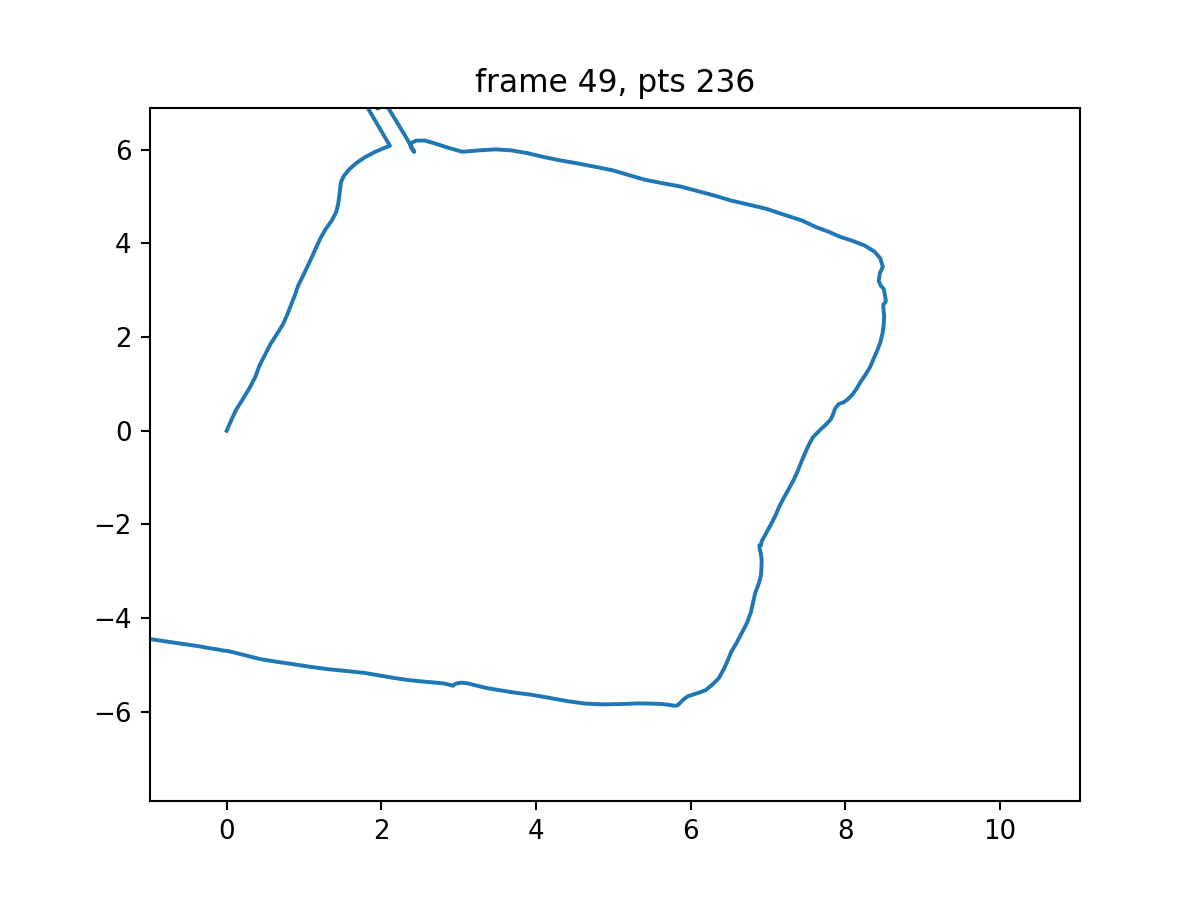

In [65]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

plt.ion()
fig = plt.figure()
ax = fig.gca() # add_subplot(111)

fig.show()
fig.canvas.draw()
for i in range(0,50):
    ax.clear()
    i1 = min(len(xs), len(ys))
    i0 = max(0, i1-600)
    ax.plot(xs[i0:i1], ys[i0:i1])
    i00 = max(0, i1-6)
    ax.scatter(xs[i00:i1], ys[i00:i1])
    plt.title("frame %d, pts %d" % (i, i1))
    fig.canvas.draw()
    ax.autoscale_view();
    plt.pause(0.5)    #sleep


In [72]:
help(animation.FuncAnimation)

Help on class FuncAnimation in module matplotlib.animation:

class FuncAnimation(TimedAnimation)
 |  Makes an animation by repeatedly calling a function ``func``.
 |  
 |  Parameters
 |  ----------
 |  fig : matplotlib.figure.Figure
 |     The figure object that is used to get draw, resize, and any
 |     other needed events.
 |  
 |  func : callable
 |     The function to call at each frame.  The first argument will
 |     be the next value in ``frames``.   Any additional positional
 |     arguments can be supplied via the ``fargs`` parameter.
 |  
 |     The required signature is::
 |  
 |        def func(frame, *fargs) -> iterable_of_artists:
 |  
 |  frames : iterable, int, generator function, or None, optional
 |      Source of data to pass ``func`` and each frame of the animation
 |  
 |      If an iterable, then simply use the values provided.  If the
 |      iterable has a length, it will override the ``save_count`` kwarg.
 |  
 |      If an integer, then equivalent to passing 

In [1]:
from ubxutils import convbinfile, calcpossingle, loadposfile, calcavgposition, updatexytime, calcposrtk
fubxA = "/home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26A.ubx"
fubxB = "/home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26B.ubx"
fubxC = "/home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26C.ubx"


In [14]:
import socket
ss = socket.socket()
ipnumber = "127.0.0.1"
portnumber = 9052
ss.bind((ipnumber, portnumber))
ss.listen(0)

In [15]:
print("Waiting for a connection on ({}, {})".format(ipnumber, portnumber))
s, addr = ss.accept()
print("Got", s, addr)
header = s.recv(4)

Waiting for a connection on (127.0.0.1, 9052)
Got <socket.socket fd=48, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 9052), raddr=('127.0.0.1', 53120)> ('127.0.0.1', 53120)


In [19]:
s.recv(10)

b'dingo\r\n'

In [13]:
s.accept()

(<socket.socket fd=43, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 9051), raddr=('127.0.0.1', 44308)>,
 ('127.0.0.1', 44308))

In [10]:
help(s.accept)

Help on method accept in module socket:

accept() method of socket.socket instance
    accept() -> (socket object, address info)
    
    Wait for an incoming connection.  Return a new socket
    representing the connection, and the address of the client.
    For IP sockets, the address info is a pair (hostaddr, port).



In [ ]:
import socket, time
ss = socket.socket()
androidipnumber = "192.168.43.1"
portnumber = 9042

# This is all that's required to connect - when the ESP is hanging on s.accept()
ss.connect(socket.getaddrinfo(androidipnumber, portnumber)[0][-1])
s = ss.makefile('rwb', 0)  # convert socket into an io stream

print(s.readline())
s.write(b"-AAA")

In [32]:
ipnumber = "127.0.0.1"
portnumber = 9054
ss = socket.socket()
ss.connect(socket.getaddrinfo(ipnumber, portnumber)[0][-1])
s = ss.makefile('rwb', 0)  # convert socket into an io stream
print(s)

In [42]:
print(s.readline())

b'2019/03/06 13:33:36.400   54.592088703   -5.927508274    70.7429   2  15   0.1199   0.0880   0.2179  -0.0465  -0.0513   0.0895   2.21    1.0\n'


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import mpl_toolkits.axes_grid1
import matplotlib.widgets

class Player(FuncAnimation):
    def __init__(self, fig, func, frames=None, init_func=None, fargs=None,
                 save_count=None, mini=0, maxi=100, pos=(0.125, 0.92), **kwargs):
        self.i = 0
        self.min=mini
        self.max=maxi
        self.runs = True
        self.forwards = True
        self.fig = fig
        self.func = func
        self.setup(pos)
        FuncAnimation.__init__(self,self.fig, self.update, frames=self.play(), 
                                           init_func=init_func, fargs=fargs,
                                           save_count=save_count, **kwargs )    

    def play(self):
        while self.runs:
            self.i = self.i+self.forwards-(not self.forwards)
            if self.i > self.min and self.i < self.max:
                yield self.i
            else:
                self.stop()
                yield self.i

    def start(self):
        self.runs=True
        self.event_source.start()

    def stop(self, event=None):
        self.runs = False
        self.event_source.stop()

    def forward(self, event=None):
        self.forwards = True
        self.start()
    def backward(self, event=None):
        self.forwards = False
        self.start()
    def oneforward(self, event=None):
        self.forwards = True
        self.onestep()
    def onebackward(self, event=None):
        self.forwards = False
        self.onestep()

    def onestep(self):
        if self.i > self.min and self.i < self.max:
            self.i = self.i+self.forwards-(not self.forwards)
        elif self.i == self.min and self.forwards:
            self.i+=1
        elif self.i == self.max and not self.forwards:
            self.i-=1
        self.func(self.i)
        self.slider.set_val(self.i)
        self.fig.canvas.draw_idle()

    def setup(self, pos):
        playerax = self.fig.add_axes([pos[0],pos[1], 0.64, 0.04])
        divider = mpl_toolkits.axes_grid1.make_axes_locatable(playerax)
        bax = divider.append_axes("right", size="80%", pad=0.05)
        sax = divider.append_axes("right", size="80%", pad=0.05)
        fax = divider.append_axes("right", size="80%", pad=0.05)
        ofax = divider.append_axes("right", size="100%", pad=0.05)
        sliderax = divider.append_axes("right", size="500%", pad=0.07)
        self.button_oneback = matplotlib.widgets.Button(playerax, label='$\u29CF$')
        self.button_back = matplotlib.widgets.Button(bax, label='$\u25C0$')
        self.button_stop = matplotlib.widgets.Button(sax, label='$\u25A0$')
        self.button_forward = matplotlib.widgets.Button(fax, label='$\u25B6$')
        self.button_oneforward = matplotlib.widgets.Button(ofax, label='$\u29D0$')
        self.button_oneback.on_clicked(self.onebackward)
        self.button_back.on_clicked(self.backward)
        self.button_stop.on_clicked(self.stop)
        self.button_forward.on_clicked(self.forward)
        self.button_oneforward.on_clicked(self.oneforward)
        self.slider = matplotlib.widgets.Slider(sliderax, '', 
                                                self.min, self.max, valinit=self.i)
        self.slider.on_changed(self.set_pos)

    def set_pos(self,i):
        self.i = int(self.slider.val)
        self.func(self.i)

    def update(self,i):
        self.slider.set_val(i)


### using this class is as easy as using FuncAnimation:            

fig, ax = plt.subplots()
x = np.linspace(0,6*np.pi, num=100)
y = np.sin(x)

ax.plot(x,y)
point, = ax.plot([],[], marker="o", color="crimson", ms=15)

def update(i):
    point.set_data(x[i],y[i])

ani = Player(fig, update, maxi=len(y)-1)

plt.show()

In [41]:
import time
import numpy as np
# ------------------- new cell ---------------------#

from bokeh.models.sources import ColumnDataSource
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, push_notebook
# ------------------- new cell ---------------------#

output_notebook()
# ------------------- new cell ---------------------#

my_figure = figure(plot_width=800, plot_height=400)
test_data = ColumnDataSource(data=dict(x=[0], y=[0]))
line = my_figure.line("x", "y", source=test_data)
handle = show(my_figure, notebook_handle=True)

new_data=dict(x=[0], y=[0])
x = []
y = []

# This block creates the thread that appends incoming positions into the arrays xs, ys, zs
# need to convert this into a class we can import that just works and is able to reconnect
# and is compatible with the matplotlib arrays

import math
columnnames = "%  GPST                  latitude(deg) longitude(deg)  height(m)   Q  ns   sdn(m)   sde(m)   sdu(m)  sdne(m)  sdeu(m)  sdun(m) age(s)  ratio".split()

lng0, lat0 = None, None
earthrad = 6378137
nyfac = 2*math.pi*earthrad/360
def parsexyz(row):
    global lng0, lat0
    srow = row.split()
    lat, lng, height = float(srow[2]), float(srow[3]), float(srow[4])
    if lng0 is None:
        lng0, lat0 = lng, lat
    exfac = nyfac*math.cos(math.radians(lat0))
    return (lng - lng0)*exfac, (lat - lat0)*nyfac, height

port = 9063
xs, ys, zs = [ ], [ ], [ ]

import socket
ss = socket.socket()
print("connecting to port", port)
ss.connect(socket.getaddrinfo("127.0.0.1", port)[0][-1])
s = ss.makefile('rwb', 0)
print("port", port, "open")
row = s.readline()
print(row)


step = 0
step_size = .1  # increment for increasing step
max_step = 1000  # arbitrary stop point for example
period = 1  # in seconds (simulate waiting for new data)
n_show = 10  # number of points to keep and show
while True:
    row = s.readline()
    p = parsexyz(row)
    time.sleep(0.05)
    x.append(p[0])
    y.append(p[1])
    new_data['x'] = x = x[-n_show:]  # prevent filling ram
    new_data['y'] = y = y[-n_show:]  # prevent filling ram

    test_data.stream(new_data, n_show)

    push_notebook(handle=handle)
    step += step_size


Loading BokehJS ...

connecting to port 9063
port 9063 open
b'2019/04/07 09:14:38.800   53.395374021   -2.972510070    97.4182   5   9   3.8746   2.2189   9.1188   0.6029  -0.8299   4.4142   0.00    0.0\n'


IndexError: list index out of range